In [1]:
# Import SpeedyWeather
using SpeedyWeather
using GeoMakie, CairoMakie

In [2]:
# 1. Define the grid
spectral_grid = SpectralGrid()

SpectralGrid:
├ Spectral:   T31 LowerTriangularMatrix{Complex{Float32}}, radius = 6.371e6 m
├ Grid:       48-ring OctahedralGaussianGrid{Float32}, 3168 grid points
├ Resolution: 401km (average)
├ Vertical:   8-layer atmosphere, 2-layer land
└ Device:     CPU using Array

In [6]:
# 2. Define the model
model = PrimitiveDryModel(spectral_grid)

PrimitiveDryModel <: PrimitiveDry
├ spectral_grid: SpectralGrid
├ device_setup: SpeedyWeather.DeviceSetup{CPU, DataType}
├ dynamics: Bool
├ geometry: Geometry{Float32, OctahedralGaussianGrid, Vector{Float32}, Vector{Float64}}
├ planet: Earth{Float32}
├ atmosphere: EarthAtmosphere{Float32}
├ coriolis: Coriolis{Float32, Vector{Float32}}
├ geopotential: Geopotential{Float32, Vector{Float32}}
├ adiabatic_conversion: AdiabaticConversion{Float32, Vector{Float32}}
├ particle_advection: NoParticleAdvection
├ initial_conditions: InitialConditions{ZonalWind, PressureOnOrography, JablonowskiTemperature, ZeroInitially}
├ forcing: NoForcing
├ drag: NoDrag
├ random_process: NoRandomProcess
├ tracers: Dict{Symbol, Tracer}
├ orography: EarthOrography{Float32, OctahedralGaussianGrid{Float32}, LowerTriangularMatrix{ComplexF32}}
├ land_sea_mask: EarthLandSeaMask{Float32, OctahedralGaussianGrid{Float32}}
├ ocean: SeasonalOceanClimatology{Float32, OctahedralGaussianArray{Float32, 2, Matrix{Float32}}}
├ lan

In [18]:
# 3. Initialize the model
simulation = initialize!(model)

Simulation{PrimitiveDryModel}
├ prognostic_variables::PrognosticVariables{...}
├ diagnostic_variables::DiagnosticVariables{...}
└ model::PrimitiveDryModel{...}

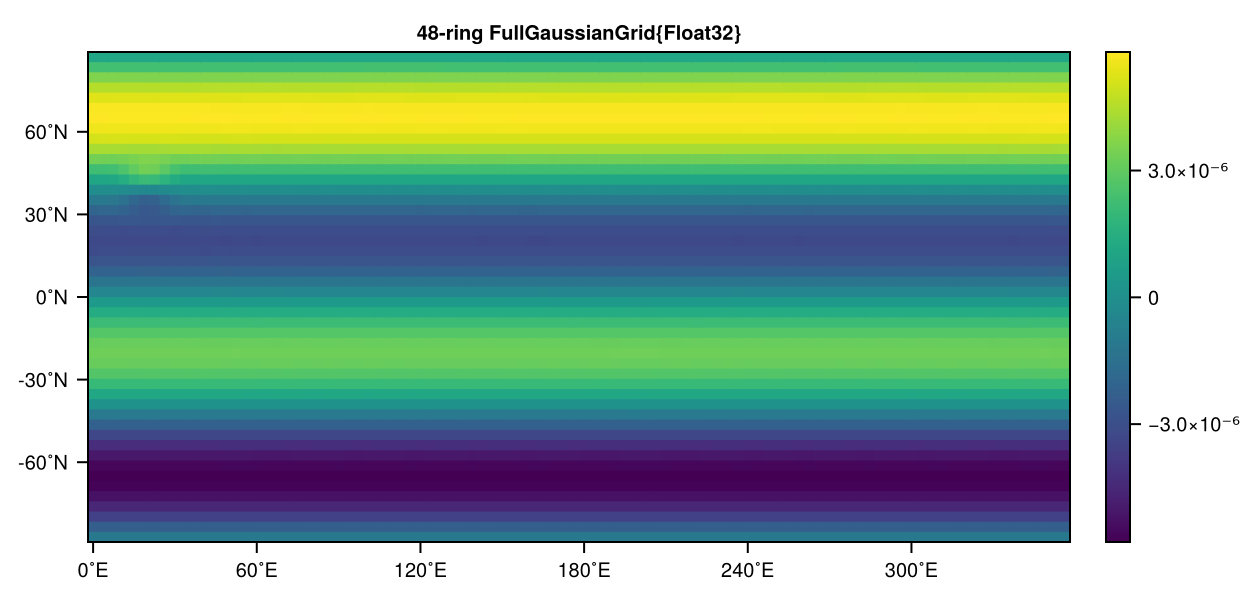

In [27]:
# Plot vorticity at the beginning
heatmap(transform(simulation.prognostic_variables.vor[1][:,end])) 
# Prognostic variables indexing : [lf][ij,k] or [time][horizontal,vertical]
# !! Will change in next version for [ij,k,lf]

In [30]:
# Run the model
run!(simulation, period=Day(10))

Weather is speedy: 100%|██████████████████| Time: 0:00:01 ( 2.02 millenia/day)


                  Surface relative vorticity [1/s]                    
   ┌────────────────────────────────────────────────────────────┐6e⁻⁵ 
 90│▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│┌──┐ 
   │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄││▄▄│ 
   │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄││▄▄│ 
   │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄││▄▄│ 
   │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄││▄▄│ 
   │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄││▄▄│ 
   │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄││▄▄│ 
 ˚N│▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄││▄▄│ 
   │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄││▄▄│ 
   │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄││▄▄│ 
   │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄││▄▄│ 
   │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄││▄▄│ 
   │▄▄

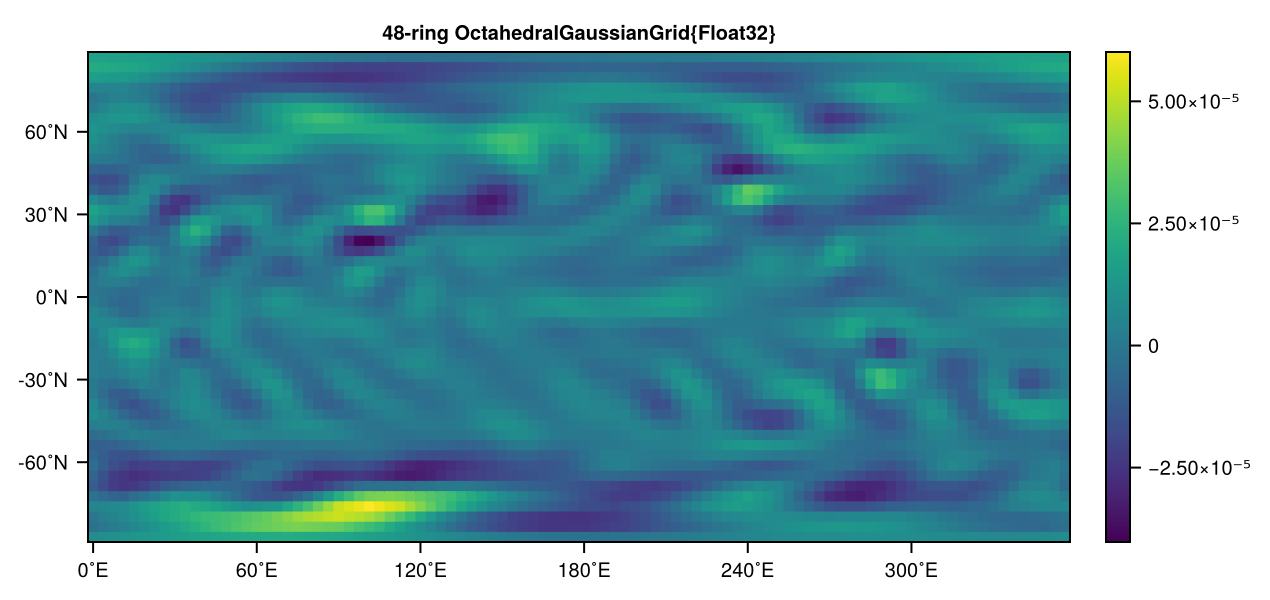

In [31]:
heatmap(simulation.diagnostic_variables.grid.vor_grid[:,end])
# Diagnostic variable indexing [ij,k] or [horizontal,vertical]
# NB : Only the last time step is stored there.